# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:**  Cakra Satriyadana
- **Email:**  cakrasatriyadana@gmail.com
- **ID Dicoding:** cakra_s


**Menentukan Pertanyaan Bisnis**
1. Bagaimana pengaruh Cuaca terhadap Aktivitas Penyewaan Sepeda ?
2. Bagaimana pola aktivitas penyewaan sepeda berubah dalam satu hari
3. Seberapa besar perbedaan penggunaan sepeda antara hari libur dan hari kerja


## Import Semua Packages/Library yang Digunakan


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


- Pada tahap ini kita memuat semua library yang dibutuhkan untuk mendukung analisis 

## Data Wrangling
## Gathering Data

In [2]:
day_path = './data/day.csv'
hour_path = './data/hour.csv'


day = pd.read_csv(day_path)
hour = pd.read_csv(hour_path)

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:

day.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
442,443,2012-03-18,1,1,3,0,0,0,2,0.472500,0.464000,0.810000,0.126883,2207,3685,5892
597,598,2012-08-20,3,1,8,0,1,1,2,0.635833,0.595967,0.734167,0.129979,1026,5504,6530
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
313,314,2011-11-10,4,0,11,0,4,1,2,0.380000,0.373721,0.813333,0.189067,190,2743,2933
247,248,2011-09-05,3,0,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236,2115,3351
10,11,2011-01-11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263
170,171,2011-06-20,2,0,6,0,1,1,2,0.635000,0.595346,0.746250,0.155475,699,3311,4010
576,577,2012-07-30,3,1,7,0,1,1,1,0.730833,0.684987,0.668750,0.153617,1040,6065,7105
223,224,2011-08-12,3,0,8,0,5,1,1,0.708333,0.654042,0.415000,0.125621,1051,3854,4905
50,51,2011-02-20,1,0,2,0,0,0,1,0.285217,0.277330,0.407826,0.223235,639,1173,1812


In [4]:

hour.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2706,2707,2011-04-27,2,0,4,16,0,3,1,1,0.70,0.6515,0.70,0.3881,29,189,218
8357,8358,2011-12-19,4,0,12,21,0,1,1,2,0.36,0.3485,0.53,0.1343,15,112,127
4328,4329,2011-07-04,3,0,7,6,1,1,0,1,0.64,0.5758,0.89,0.1642,5,11,16
7990,7991,2011-12-04,4,0,12,14,0,0,0,1,0.42,0.4242,0.62,0.1343,77,246,323
10977,10978,2012-04-07,2,1,4,13,0,6,0,1,0.50,0.4848,0.22,0.1940,355,288,643
12508,12509,2012-06-10,2,1,6,9,0,0,0,1,0.70,0.6515,0.58,0.0000,91,175,266
7587,7588,2011-11-17,4,0,11,18,0,4,1,1,0.32,0.3182,0.39,0.1940,9,298,307
795,796,2011-02-05,1,0,2,14,0,6,0,3,0.22,0.2727,1.00,0.0000,5,50,55
8378,8379,2011-12-20,4,0,12,18,0,2,1,1,0.38,0.3939,0.66,0.1940,26,385,411
11916,11917,2012-05-16,2,1,5,17,0,3,1,1,0.72,0.6667,0.51,0.1940,104,769,873


In [5]:
df = day.merge(hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(df.shape)
# df_product.head()
df.loc[df["dteday"].isnull()]
df.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Setelah memuat library selanjutnhya memuat semua data serta menggabungkan dataset day dan hour menjadi satu untuk mempermudah analisis

## Assessing Data

In [6]:

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

In [11]:
df.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Tahap ini kita melihat seluruh informasi data yang telah dimuat

## Cleaning Data

In [12]:
def explore_missing_and_duplicates(data):
    # Mencari nilai hilang
    null_values = data.isna().sum().to_frame()
    null_values = null_values.rename(columns={0: 'missing_values'})
    null_values['% of total'] = (null_values['missing_values'] / data.shape[0]).round(2)
    null_values = null_values.sort_values(by='missing_values', ascending=False)

    # Mencari data yang terduplikat
    duplicate_values = data[data.duplicated()]

    return null_values, duplicate_values


In [13]:
# Memanggil fungsi untuk DataFrame 'day'
null_values_day, duplicate_values_day = explore_missing_and_duplicates(day)



# Menampilkan hasil untuk DataFrame 'day'
print("Null values in 'day':")
print(null_values_day)

print("\nDuplicate values in 'day':")
print(duplicate_values_day)




Null values in 'day':
            missing_values  % of total
instant                  0         0.0
dteday                   0         0.0
season                   0         0.0
yr                       0         0.0
mnth                     0         0.0
holiday                  0         0.0
weekday                  0         0.0
workingday               0         0.0
weathersit               0         0.0
temp                     0         0.0
atemp                    0         0.0
hum                      0         0.0
windspeed                0         0.0
casual                   0         0.0
registered               0         0.0
cnt                      0         0.0

Duplicate values in 'day':
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [14]:
# Memanggil fungsi untuk DataFrame 'hour'
null_values_hour, duplicate_values_hour = explore_missing_and_duplicates(hour)
# Menampilkan hasil untuk DataFrame 'hour'
print("\nNull values in 'hour':")
print(null_values_hour)

print("\nDuplicate values in 'hour':")
print(duplicate_values_hour)


Null values in 'hour':
            missing_values  % of total
instant                  0         0.0
weathersit               0         0.0
registered               0         0.0
casual                   0         0.0
windspeed                0         0.0
hum                      0         0.0
atemp                    0         0.0
temp                     0         0.0
workingday               0         0.0
dteday                   0         0.0
weekday                  0         0.0
holiday                  0         0.0
hr                       0         0.0
mnth                     0         0.0
yr                       0         0.0
season                   0         0.0
cnt                      0         0.0

Duplicate values in 'hour':
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [15]:
# Memanggil fungsi untuk DataFrame 'hour'
null_values_hour, duplicate_values_hour = explore_missing_and_duplicates(df)
# Menampilkan hasil untuk DataFrame 'hour'
print("\nNull values in 'df':")
print(null_values_hour)

print("\nDuplicate values in 'df':")
print(duplicate_values_hour)


Null values in 'df':
                   missing_values  % of total
instant_daily                   0         0.0
dteday                          0         0.0
registered_hourly               0         0.0
casual_hourly                   0         0.0
windspeed_hourly                0         0.0
hum_hourly                      0         0.0
atemp_hourly                    0         0.0
temp_hourly                     0         0.0
weathersit_hourly               0         0.0
workingday_hourly               0         0.0
weekday_hourly                  0         0.0
holiday_hourly                  0         0.0
hr                              0         0.0
mnth_hourly                     0         0.0
yr_hourly                       0         0.0
season_hourly                   0         0.0
instant_hourly                  0         0.0
cnt_daily                       0         0.0
registered_daily                0         0.0
casual_daily                    0         0.0
windspeed_da

In [16]:
df['season_daily'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)
df['season_hourly'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)

In [17]:

df['weekday_daily'].replace({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'}, inplace=True)

df['weekday_hourly'].replace({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'}, inplace=True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  object 
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  object 
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

Selanjutnya mengecek apakah data yang hilang, data terduplikat, tipe data yang tidak sesuai, dan memperkaya data dengan mengubah beberapa value agar mudah dipahami

## Exploratory Data Analysis (EDA)
## Explore ...

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  object 
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  object 
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

In [20]:
columns_to_aggregate = ['cnt_hourly', 'workingday_hourly', 'windspeed_hourly']

# Menggunakan groupby untuk mengelompokkan data berdasarkan musim
hourly_grouped = df.groupby('season_hourly')[columns_to_aggregate].agg({
    'workingday_hourly': 'count',     # Menambahkan rata-rata untuk hari kerja
    'cnt_hourly': ['mean', 'std'],  # Menambahkan rata-rata dan deviasi standar untuk jumlah penyewa
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Menambahkan rata-rata dan deviasi standar untuk kecepatan angin
}).reset_index().sort_values(by=("workingday_hourly","count"), ascending=False)
hourly_grouped

season_hourly workingday_hourly  cnt_hourly             windspeed_hourly  \
                            count        mean         std              max   
0          fall              4496  236.016237  197.711630           0.8507   
2        summer              4409  208.344069  188.362473           0.7164   
1        spring              4242  111.114569  119.224010           0.8060   
3        winter              4232  198.868856  182.967972           0.6418   

                             
   min      mean <lambda_0>  
0  0.0  0.171593     0.8507  
2  0.0  0.203410     0.7164  
1  0.0  0.215107     0.8060  
3  0.0  0.170819     0.6418

In [21]:
columns_to_aggregate = ['cnt_hourly', 'workingday_hourly', 'windspeed_hourly']

# Menggunakan groupby untuk mengelompokkan data berdasarkan musim
hourly_grouped = df.groupby('season_hourly')[columns_to_aggregate].agg({
    'workingday_hourly': 'count',     # Menambahkan rata-rata untuk hari kerja
    'cnt_hourly': ['mean', 'std'],  # Menambahkan rata-rata dan deviasi standar untuk jumlah penyewa
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Menambahkan rata-rata dan deviasi standar untuk kecepatan angin
}).reset_index().sort_values(by=("workingday_hourly","count"), ascending=False)
hourly_grouped

season_hourly workingday_hourly  cnt_hourly             windspeed_hourly  \
                            count        mean         std              max   
0          fall              4496  236.016237  197.711630           0.8507   
2        summer              4409  208.344069  188.362473           0.7164   
1        spring              4242  111.114569  119.224010           0.8060   
3        winter              4232  198.868856  182.967972           0.6418   

                             
   min      mean <lambda_0>  
0  0.0  0.171593     0.8507  
2  0.0  0.203410     0.7164  
1  0.0  0.215107     0.8060  
3  0.0  0.170819     0.6418

In [22]:
df.groupby(by="season_hourly").agg({
    "workingday_hourly": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Membuat fungsi custom untuk range
}).sort_values(by=("workingday_hourly", "count"), ascending=False) #

workingday_hourly windspeed_hourly                          
                          count              max  min      mean <lambda_0>
season_hourly                                                             
fall                       4496           0.8507  0.0  0.171593     0.8507
summer                     4409           0.7164  0.0  0.203410     0.7164
spring                     4242           0.8060  0.0  0.215107     0.8060
winter                     4232           0.6418  0.0  0.170819     0.6418

In [23]:
hourly = df.groupby('hr')[['casual_hourly', 'registered_hourly']].agg(['max', 'mean', 'min', 'std']).sort_values(by=('registered_hourly', 'min'), ascending=False)
hourly


casual_hourly                           registered_hourly                  \
             max       mean min        std               max        mean min   
hr                                                                             
18           266  61.120879   0  50.981553               886  364.390110  20   
17           347  74.273973   0  61.491021               885  387.178082  14   
14           361  75.567901   0  71.599225               502  165.381344  12   
19           230  48.770604   0  42.328913               662  262.752747  11   
13           355  72.308642   0  69.819228               491  181.352538   9   
20           237  36.233516   0  32.103347               461  189.796703   8   
10           209  46.477304   0  41.346206               351  127.191197   8   
16           367  73.745205   0  67.015206               481  238.238356   8   
21           222  28.255495   0  25.378252               362  144.059066   6   
9            142  30.891334   0  24.472856               399  188.418157   6   
22           175  22.252747   0  20.450211               327  109.082418   5   
11           268  59.540578   0  54.481788               446  148.602476   5   
15           357  74.905350   0  70.289359               456  176.327846   4   
8             69  21.679505   0  13.741229               808  337.331499   4   
12           362  68.293956   0  64.394237               526  185.021978   3   
23            71  15.199176   0  13.804596               220   72.631868   2   
7             40  11.055021   0   8.356205               572  201.009629   1   
1             49   6.504144   0   7.735334               139   26.871547   0   
6             19   4.161379   0   3.691509               203   71.882759   0   
5             16   1.411437   0   1.790581                64   18.478382   0   
4             13   1.253945   0   1.887669                22    5.098996   0   
3             26   2.715925   0   4.315795                61    9.011478   0   
2             44   4.772028   0   6.514780               104   18.097902   0   
0             68  10.158402   0  10.667953               234   43.739669   0   

                
           std  
hr              
18  203.599896  
17  211.676303  
14   84.055205  
19  138.708622  
13   87.424775  
20  100.293791  
10   66.281668  
16  103.765726  
21   73.149848  
9    84.633490  
22   55.252765  
11   79.090301  
15   84.488219  
8   229.698404  
12   89.240873  
23   40.446431  
7   157.120459  
1    27.344153  
6    53.535307  
5    12.674751  
4     3.134479  
3     9.743691  
2    21.303895  
0    34.019585

In [24]:

day_order = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
df['weekday_daily'] = pd.Categorical(df['weekday_daily'], categories=day_order, ordered=True)

weekly = df.groupby('weekday_daily')[['casual_daily', 'registered_daily']].agg(['max', 'mean', 'min', 'std'])
weekly

C:\Users\cakra2\AppData\Local\Temp\ipykernel_26176\3518522490.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly = df.groupby('weekday_daily')[['casual_daily', 'registered_daily']].agg(['max', 'mean', 'min', 'std'])


casual_daily                              registered_daily  \
                       max         mean min         std              max   
weekday_daily                                                              
sunday                3283  1341.694245  54  806.109301             5657   
monday                3065   682.732553   2  489.817655             6435   
tuesday               1348   564.445985   9  338.161224             6697   
wednesday             2562   554.821818   9  399.481576             6946   
thursday              1405   596.388507  15  367.768436             6781   
friday                2469   754.256132  38  480.716341             6917   
saturday              3410  1469.297771  57  921.517727             5966   

                                               
                      mean   min          std  
weekday_daily                                  
sunday         2897.811751   451  1172.237837  
monday         3709.188382    20  1458.330480  
tuesday        4002.262128   573  1509.808543  
wednesday      4019.787475   432  1703.492653  
thursday       4107.114933   416  1609.282590  
friday         3946.582228  1129  1483.781108  
saturday       3092.246417   570  1348.355422

In [25]:
season_order = ['spring', 'summer', 'fall', 'winter']
df['season_daily'] = pd.Categorical(df['season_daily'], categories=season_order, ordered=True)

seasons = df.groupby('season_daily')[['casual_daily', 'registered_daily']].agg(['max', 'mean', 'min', 'std'])
seasons

C:\Users\cakra2\AppData\Local\Temp\ipykernel_26176\1918867230.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasons = df.groupby('season_daily')[['casual_daily', 'registered_daily']].agg(['max', 'mean', 'min', 'std'])


casual_daily                               registered_daily  \
                      max         mean  min         std              max   
season_daily                                                               
spring               3155   339.582273    9  388.431620             5315   
summer               3410  1106.982309  120  735.794362             6456   
fall                 3160  1204.153915  118  593.937687             6917   
winter               3031   735.468100    2  603.919639             6946   

                                             
                     mean  min          std  
season_daily                                 
spring        2295.765912  416  1193.673541  
summer        3888.270810  674  1348.976043  
fall          4449.939279  889  1294.726348  
winter        4029.897921   20  1407.112858

In [26]:
# Menghitung total 'casual' dan 'registered'
total_casual = df['casual_hourly'].sum()
total_registered = df['registered_hourly'].sum()

# Menghitung persentase
percentage_casual = (total_casual / (total_casual + total_registered)) * 100
percentage_registered = (total_registered / (total_casual + total_registered)) * 100

print("Casual =", percentage_casual, "%")
print("Registered =", percentage_registered, "%")

Casual = 18.830168382645258 %
Registered = 81.16983161735475 %


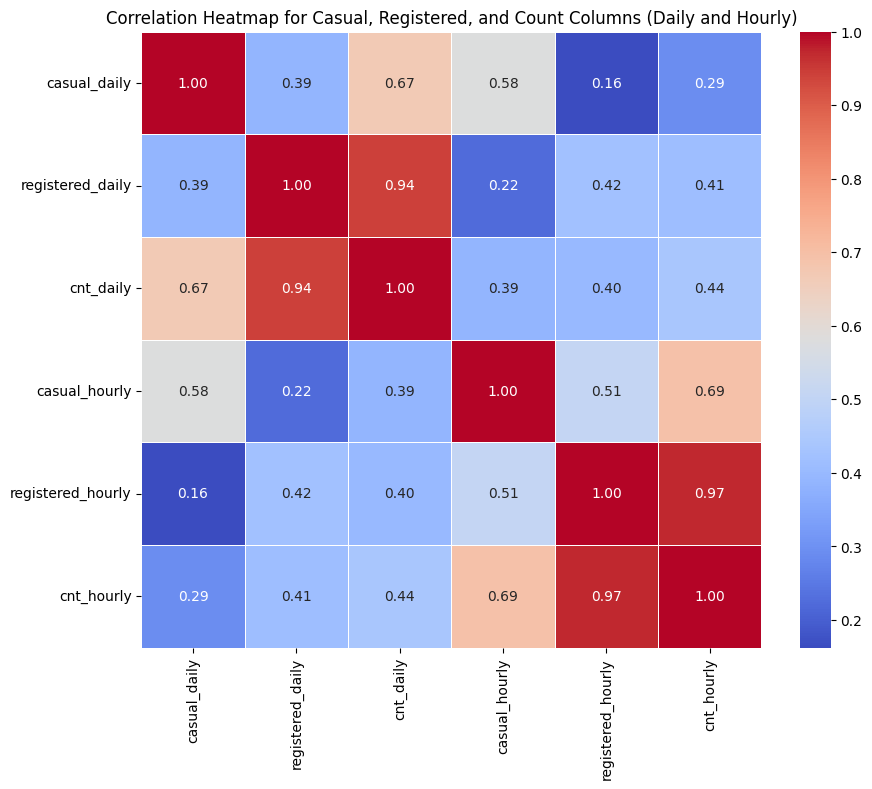

In [27]:

columns_of_interest = ['casual_daily', 'registered_daily', 'cnt_daily', 'casual_hourly', 'registered_hourly', 'cnt_hourly']
numeric_columns_of_interest = df[columns_of_interest].select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_columns_of_interest.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Casual, Registered, and Count Columns (Daily and Hourly)')
plt.show()


Tahap EDA (Exploratory Data Analysis) ini melibatkan analisis dan pemahaman awal terhadap data yang dimiliki. Berikut adalah penjelasan untuk setiap tahap EDA yang dilakukan:

1. Analisis Musiman dan Cuaca (season_hourly, workingday_hourly, windspeed_hourly):
- Data ini memberikan informasi tentang pola penyewaan berdasarkan musim, hari kerja, dan kecepatan angin.
- Musim gugur memiliki tingkat penyewaan tertinggi, diikuti oleh musim panas dan musim dingin. Cuaca yang nyaman mungkin menjadi faktor peningkatan aktivitas penyewaan.
- Hari kerja cenderung memiliki tingkat penyewaan yang lebih tinggi dibandingkan hari libur.
- Kecepatan angin memiliki variasi yang dapat memengaruhi aktivitas penyewaan.

2. Analisis Jam dalam Sehari (hr) dan Kecepatan Angin (windspeed_hourly):
- Menunjukkan aktivitas penyewaan sepeda pada setiap jam dalam sehari dan hubungannya dengan kecepatan angin.
- Pada jam-jam tertentu, terdapat puncak aktivitas penyewaan, yang bisa menjadi fokus penawaran atau promosi.

3. Analisis Jam dalam Sehari dan Jumlah Penyewaan (casual_hourly, registered_hourly, cnt_hourly):
- Menunjukkan pola penyewaan sepeda harian berdasarkan pengguna casual dan terdaftar.
- Puncak aktivitas pengguna casual terjadi pada sore hingga malam, sementara pengguna terdaftar lebih merata sepanjang hari.
- Jumlah penyewaan secara keseluruhan mencapai puncaknya pada sore hingga malam.

4. Analisis Jam dalam Sehari dan Jumlah Penyewaan (cnt_hourly):
- Menyajikan pola penyewaan sepeda harian secara umum tanpa membedakan pengguna casual dan terdaftar.
- Puncak aktivitas penyewaan terjadi pada sore hingga malam.

5. Analisis Harian dan Jumlah Penyewaan (weekday_daily):
- Menunjukkan perbandingan jumlah penyewaan sepeda harian antara hari kerja dan hari libur.
- Hari kerja memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari libur.

6. Analisis Musiman dan Jumlah Penyewaan Harian (season_daily):
- Menampilkan perbandingan jumlah penyewaan harian berdasarkan musim.
- Musim panas dan musim gugur memiliki jumlah penyewaan harian yang lebih tinggi.

7. Analisis Jumlah Penyewaan Harian (casual_daily, registered_daily):
- Menunjukkan statistik jumlah penyewaan harian oleh pengguna casual dan terdaftar.
- Pengguna terdaftar memiliki kontribusi yang signifikan terhadap total penyewaan harian.

*Persentase Kontribusi Pengguna Casual dan Terdaftar:*
Casual: 18.83%
Registered: 81.17%

## Visualization & Explanatory Analysis

Pada Tahap ini kita memvisualisasikan data kita berdasrkan Pertanyaan bisnis yang telah dibuat sebelumnya

### Pertanyaan 1: Bagaimana pengaruh Cuaca terhadap Aktivitas Penyewaan Berdasarkan pengguna Casual Dan Registered?

C:\Users\cakra2\AppData\Local\Temp\ipykernel_26176\1965717431.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_data_casual = df.groupby(['season_daily'])['casual_daily'].mean().reset_index()
C:\Users\cakra2\AppData\Local\Temp\ipykernel_26176\1965717431.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_data_registered = df.groupby(['season_daily'])['registered_daily'].mean().reset_index()
C:\Users\cakra2\AppData\Local\Temp\ipykernel_26176\1965717431.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

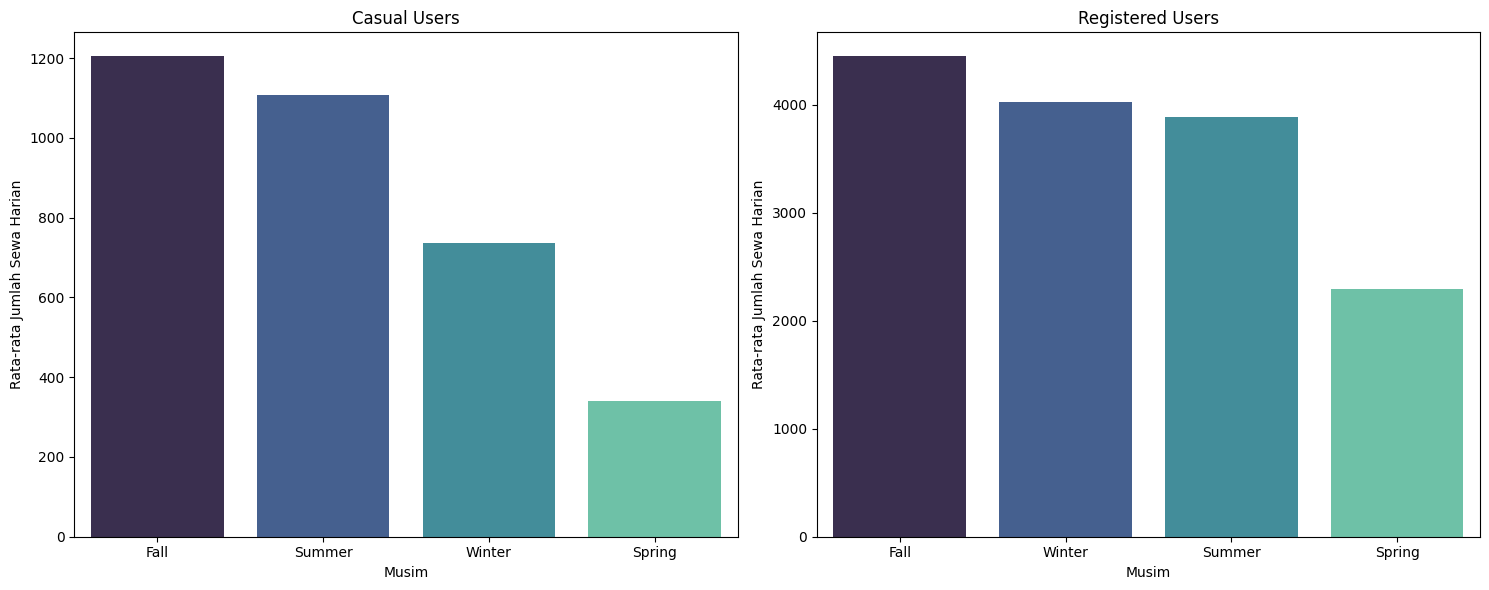

In [28]:
# Group by daily season and calculate the mean for casual and registered users
seasonal_data_casual = df.groupby(['season_daily'])['casual_daily'].mean().reset_index()
seasonal_data_registered = df.groupby(['season_daily'])['registered_daily'].mean().reset_index()

# Memberi nama musim
seasonal_data_casual['season_name'] = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_data_registered['season_name'] = ['Spring', 'Summer', 'Fall', 'Winter']

# Mengurutkan data berdasarkan jumlah sewa harian (casual users)
seasonal_data_casual = seasonal_data_casual.sort_values(by='casual_daily', ascending=False)

# Mengurutkan data berdasarkan jumlah sewa harian (registered users)
seasonal_data_registered = seasonal_data_registered.sort_values(by='registered_daily', ascending=False)

# Visualisasi menggunakan barplot seaborn
plt.figure(figsize=(15, 6))

# Plot untuk casual users
plt.subplot(1, 2, 1)
sns.barplot(x='season_name', y='casual_daily', data=seasonal_data_casual, palette="mako")
plt.title('Casual Users')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')

# Plot untuk registered users
plt.subplot(1, 2, 2)
sns.barplot(x='season_name', y='registered_daily', data=seasonal_data_registered, palette="mako")
plt.title('Registered Users')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')

plt.tight_layout()  # Untuk memastikan subplot tidak tumpang tindih
plt.show()


In [29]:
import plotly.express as px

# Group by daily season and calculate the mean for casual and registered users
seasonal_data = df.groupby(['season_daily'])[['casual_daily', 'registered_daily']].mean().reset_index()

# Memberi nama musim
seasonal_data['season_name'] = ['Spring', 'Summer', 'Fall', 'Winter']

# Mengurutkan data berdasarkan jumlah sewa harian
seasonal_data = seasonal_data.sort_values(by='casual_daily', ascending=False)

# Plot using Plotly Express
fig = px.bar(seasonal_data, x='season_name', y=['casual_daily', 'registered_daily'],
             title='Jumlah Rata-rata Sewa Harian berdasarkan Musim',
             labels={'value': 'Rata-rata Jumlah Sewa Harian', 'variable': 'User Type', 'season_name': 'Musim'},
             color_discrete_sequence=['skyblue', 'salmon'])

# Display the Plotly Express plot
fig.show()


C:\Users\cakra2\AppData\Local\Temp\ipykernel_26176\1767567311.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_data = df.groupby(['season_daily'])[['casual_daily', 'registered_daily']].mean().reset_index()


### Pertanyaan 2. Bagaimana pola aktivitas penyewaan sepeda berubah dalam satu hari

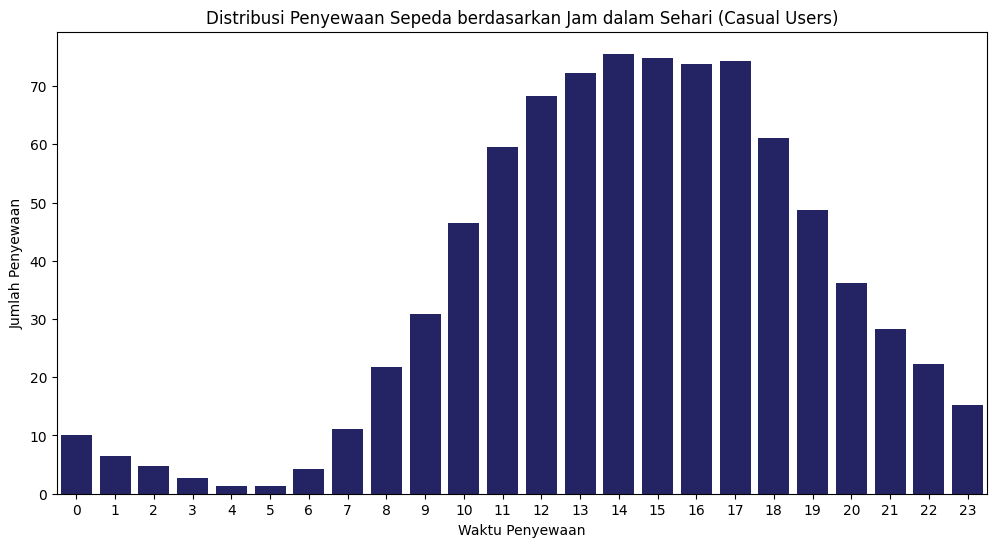

In [30]:
hourly_counts = df.groupby('hr')['casual_hourly'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='midnightblue')
plt.title('Distribusi Penyewaan Sepeda berdasarkan Jam dalam Sehari (Casual Users)')
plt.xlabel('Waktu Penyewaan')
plt.ylabel('Jumlah Penyewaan')
plt.show()
     

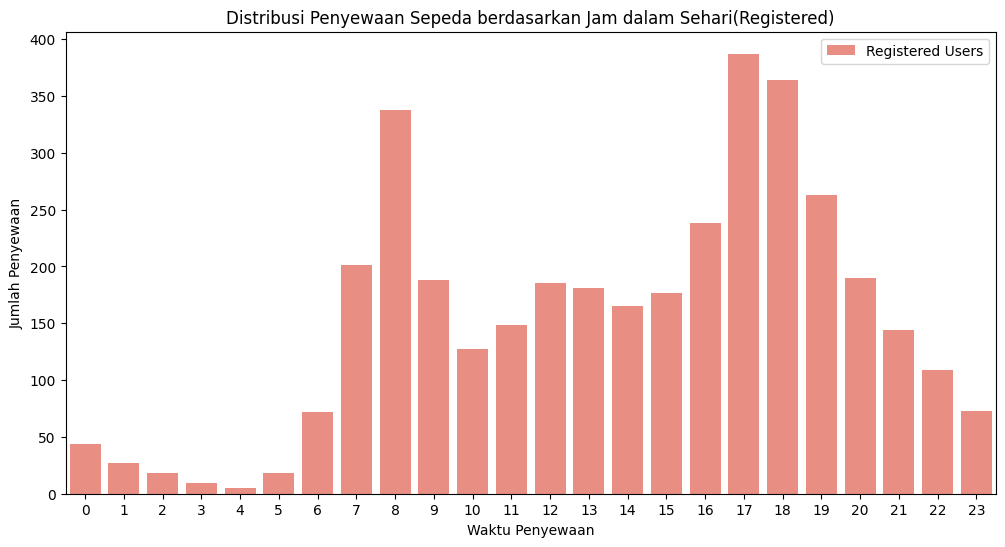

In [31]:
hourly_counts_registered = df.groupby('hr')['registered_hourly'].mean()

plt.figure(figsize=(12, 6))

# Plotting both casual and registered users
sns.barplot(x=hourly_counts_registered.index, y=hourly_counts_registered.values, color='salmon', label='Registered Users')

plt.title('Distribusi Penyewaan Sepeda berdasarkan Jam dalam Sehari(Registered)')
plt.xlabel('Waktu Penyewaan')
plt.ylabel('Jumlah Penyewaan')
plt.legend()

plt.show()

<Figure size 1200x600 with 0 Axes>

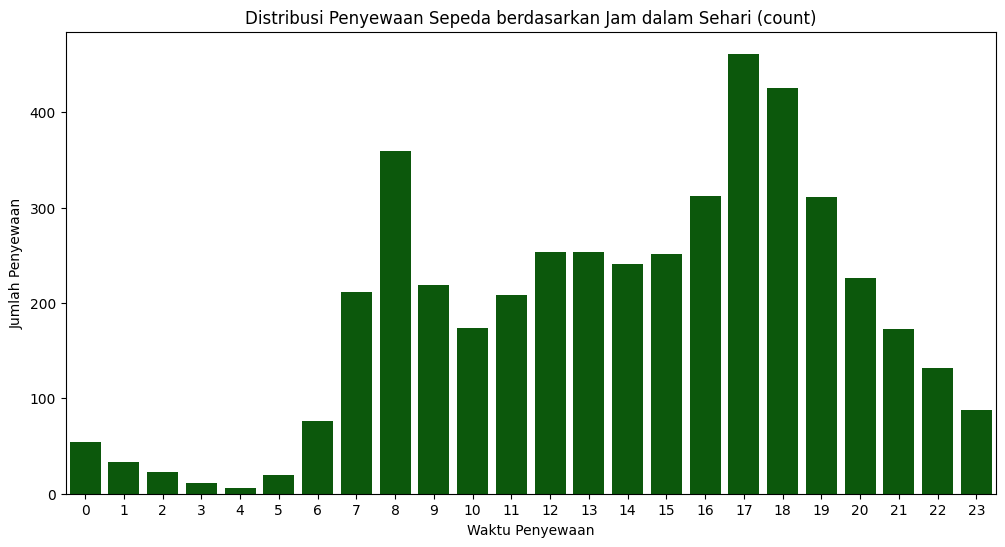

In [32]:
hourly_counts= df.groupby('hr')['cnt_hourly'].mean()

plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='darkgreen')
plt.title('Distribusi Penyewaan Sepeda berdasarkan Jam dalam Sehari (count)')
plt.xlabel('Waktu Penyewaan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 3. Seberapa besar perbedaan penggunaan sepeda antara hari libur dan hari kerja

C:\Users\cakra2\AppData\Local\Temp\ipykernel_26176\1966826234.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cakra2\AppData\Local\Temp\ipykernel_26176\1966826234.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




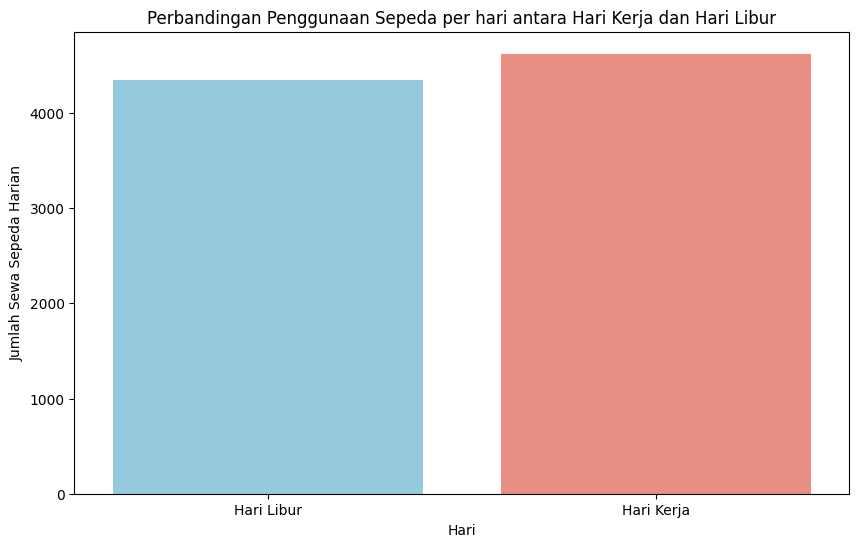

In [33]:
plt.figure(figsize=(10, 6))

# Buat barplot dengan warna yang diinginkan, misalnya 'skyblue' dan 'salmon'
sns.barplot(x="workingday_daily", y="cnt_daily", data=df, ci=None, palette=['skyblue', 'salmon'])

# Tambahkan label pada sumbu y dan judul plot
plt.xlabel("Hari")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.title("Perbandingan Penggunaan Sepeda per hari antara Hari Kerja dan Hari Libur")

# Ganti label pada sumbu x
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])

# Tampilkan plot
plt.show()

# Conclusions

### Pertanyaan 1. Bagaimana pengaruh Cuaca terhadap Aktivitas Penyewaan Berdasarkan pengguna Casual Dan Registered?

1. Musim Gugur (Fall):
  - Pengguna casual paling banyak menyewa sepeda pada musim gugur, sementara pengguna terdaftar juga memiliki tingkat penyewaan yang tinggi pada musim ini.
  - Cuaca yang nyaman dan kondisi lingkungan yang indah mungkin menjadi faktor pengaruh pada peningkatan tingkat penyewaan.

2. Musim Panas (Summer): 
  - Meskipun terjadi penurunan dibandingkan dengan musim gugur, musim panas tetap menjadi salah satu musim dengan tingkat penyewaan tertinggi bagi pengguna casual dan relatif tinggi bagi pengguna terdaftar.

3. Musim Dingin (Winter): 
  - Kedua kelompok pengguna mengalami penurunan tajam selama musim dingin. Kondisi cuaca yang kurang mendukung dan preferensi untuk aktivitas indoor mungkin menjadi penyebabnya.

4. Musim Semi (Spring): 
  - Musim semi memiliki tingkat penyewaan yang moderat, dengan kecenderungan lebih rendah dibandingkan musim gugur dan panas untuk kedua kelompok pengguna.

5. Pengguna Casual vs. Pengguna Terdaftar: 

- Pengguna casual cenderung memiliki tingkat penyewaan yang lebih tinggi dibandingkan pengguna terdaftar pada musim gugur.
- Pengguna terdaftar cenderung memiliki tingkat penyewaan yang lebih tinggi selama musim panas dibandingkan dengan pengguna casual.
- Kedua kelompok mengalami penurunan yang serupa selama musim dingin.
- Pada musim semi, pola tingkat penyewaan relatif serupa antara kedua kelompok pengguna.

### Pertanyaan 2. Bagaimana pola aktivitas penyewaan sepeda berubah dalam satu hari

1. Pola Umum Aktivitas Penyewaan Harian:

- Pengguna casual cenderung menyewa sepeda pada rentang waktu sore hingga malam, menunjukkan preferensi untuk kegiatan rekreasi di luar jam kerja.

- Pengguna terdaftar menunjukkan pola yang berbeda, dengan puncak aktivitas pada pagi hari dan sore hingga malam. Ini mungkin mencerminkan penggunaan sepeda untuk keperluan komutasi atau pekerjaan.

2. Perbedaan Aktivitas Pengguna Casual dan Terdaftar:

- Aktivitas penyewaan sepeda casual cenderung terjadi pada sore hingga malam, menunjukkan potensi untuk kegiatan rekreasi atau penggunaan non-rutin.

- Pengguna terdaftar menunjukkan aktivitas yang lebih merata sepanjang hari, menunjukkan penggunaan sepeda sebagai sarana transportasi harian.

3. Aktivitas Penyewaan Sepeda Secara Keseluruhan:

- Jumlah penyewaan sepeda mencapai puncaknya pada sore hingga malam, mencerminkan gabungan pola casual dan registered users.
- Aktivitas ini dapat dijadikan fokus untuk peningkatan layanan atau penawaran khusus pada jam-jam tersebut.

### Pertanyaan 3. Seberapa besar perbedaan penggunaan sepeda antara hari libur dan hari kerja

1. Perbandingan Jumlah Sewa Sepeda:

- Jumlah penyewaan sepeda pada hari kerja (1) lebih tinggi dibandingkan dengan hari libur (0), menunjukkan tingkat aktivitas yang lebih tinggi selama hari kerja.  

2. Pengaruh Hari Kerja pada Penggunaan Sepeda:

- Grafik menunjukkan bahwa hari kerja memiliki dampak positif terhadap penggunaan sepeda, dengan jumlah sewa sepeda harian yang lebih tinggi dibandingkan hari libur.
- Potensi penyewaan sepeda pada hari kerja mungkin disebabkan oleh kebutuhan komutasi dan aktivitas harian.

# Kesimpulan Umum

Kesimpulan Umum:

1. Pengaruh Cuaca Terhadap Aktivitas Penyewaan:

- Musim gugur menjadi musim dengan tingkat penyewaan tertinggi untuk kedua kelompok pengguna (casual dan terdaftar). Cuaca yang nyaman dan kondisi lingkungan yang indah mungkin menjadi faktor peningkatan aktivitas penyewaan.
- Musim panas tetap menjadi salah satu musim dengan tingkat penyewaan tinggi, meskipun terjadi penurunan.
- Penurunan tajam terjadi selama musim dingin, yang dapat diatributkan pada kondisi cuaca yang kurang mendukung dan preferensi untuk aktivitas indoor.
- Musim semi menunjukkan tingkat penyewaan yang moderat, namun lebih rendah dibandingkan musim gugur dan panas.

2. Pola Aktivitas Penyewaan Sepeda Harian:

- Aktivitas penyewaan sepeda harian (casual users) memiliki puncak pada sore hingga malam, menandakan potensi penggunaan sepeda untuk kegiatan rekreasi atau non-rutin.
- Aktivitas penyewaan sepeda terdaftar (registered users) lebih merata sepanjang hari, menunjukkan kecenderungan penggunaan sepeda untuk keperluan harian atau komutasi.
- Jumlah penyewaan secara keseluruhan menunjukkan puncak aktivitas pada sore hingga malam.

3. Perbedaan Penggunaan Sepeda antara Hari Kerja dan Hari Libur:

- Jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur.
- Hari kerja memiliki dampak positif terhadap penggunaan sepeda, dan potensi penyewaan lebih tinggi pada hari-hari kerja mungkin terkait dengan kebutuhan komutasi.

Rekomendasi:

- Pada musim gugur, perlu dilakukan promosi atau penawaran khusus untuk meningkatkan partisipasi pengguna casual.
- Pada musim panas, dapat dipertimbangkan peningkatan kapasitas sepeda atau fasilitas untuk mengakomodasi lonjakan permintaan.
- Selama musim dingin, strategi pemasaran dapat difokuskan pada aktivitas indoor atau alternatif lainnya untuk tetap mempertahankan minat pengguna.
- Pada hari-hari kerja, peningkatan fasilitas komutasi seperti penyediaan parkir sepeda dapat meningkatkan partisipasi pengguna terdaftar.